# Preprocessing, Training, & Modeling

## Table of Contents<a id='Table_of_Contents'></a>
* [1 Processing, Training, & Modeling](#1_Processing_,_Training_,_Modeling)
    * [1.1 Table of Contents](#1.1_Table_of_Contents)
    * [1.2 Imports](#1.2_Imports)
    * [1.3 Load Data](#1.3_Load_Data)
    * [1.4 Feature Engineering](#1.4_Feature_Engineering)
        * [1.4.1 Model Building](#1.4.1_Model_Building) 

## Imports<a id='1.2_Imports'></a>

In [1]:
#call all import statements and their necessary pacakges
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

## Load Data<a id='1.3_Imports'></a>

In [2]:
movies = pd.read_csv('C:/Users/sathw/OneDrive/Desktop/Springboard_work/IMDB-Movie-Ratings/data/movies_cleaned.csv')
ratings = pd.read_csv('C:/Users/sathw/OneDrive/Desktop/Springboard_work/IMDB-Movie-Ratings/data/ratings_cleaned.csv')

In [3]:
combined_df = pd.merge(movies,ratings, on ='id', how='left')

In [4]:
combined_df.info()           

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1183206 entries, 0 to 1183205
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   adult                  1183206 non-null  bool   
 1   belongs_to_collection  275952 non-null   object 
 2   budget                 1183206 non-null  float64
 3   genres                 1183206 non-null  object 
 4   homepage               281360 non-null   object 
 5   id                     1183206 non-null  int64  
 6   imdb_id                1183180 non-null  object 
 7   original_language      1183193 non-null  object 
 8   original_title         1183206 non-null  object 
 9   overview               1178266 non-null  object 
 10  popularity             1183206 non-null  float64
 11  poster_path            1181842 non-null  object 
 12  production_companies   1183206 non-null  object 
 13  production_countries   1183206 non-null  object 
 14  release_date      

In [5]:
combined_df.shape

(1183206, 30)

In [6]:
combined_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,year,day,month,num_genres,userId,rating
count,1.183206e+06,1.183206e+06,1.183206e+06,1.183206e+06,1.182867e+06,1.183206e+06,1.183206e+06,1.182404e+06,1.182404e+06,1.182404e+06,1.183206e+06,1.143571e+06,1.143571e+06
mean,1.912366e+07,1.079739e+04,7.854956e+00,7.237566e+07,1.080995e+02,6.584738e+00,6.413840e+02,1.987447e+03,1.518177e+01,6.932811e+00,2.409820e+00,1.347564e+04,7.062312e+00
std,3.731519e+07,3.423603e+04,6.648255e+00,1.727673e+08,2.598008e+01,1.125276e+00,1.201326e+03,2.156605e+01,9.149474e+00,3.533301e+00,1.057717e+00,7.803694e+03,2.120801e+00
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.874000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,0.000000e+00,5.090000e+02,2.686234e+00,0.000000e+00,9.400000e+01,6.100000e+00,2.500000e+01,1.975000e+03,7.000000e+00,4.000000e+00,2.000000e+00,6.672000e+03,6.000000e+00
50%,1.073000e+06,1.580000e+03,7.274948e+00,1.108462e+06,1.050000e+02,6.800000e+00,1.470000e+02,1.996000e+03,1.500000e+01,7.000000e+00,2.000000e+00,1.338700e+04,8.000000e+00
75%,2.200000e+07,3.396000e+03,1.126747e+01,6.867323e+07,1.200000e+02,7.300000e+00,6.300000e+02,2.004000e+03,2.300000e+01,1.000000e+01,3.000000e+00,2.028400e+04,8.000000e+00
max,3.800000e+08,4.691720e+05,5.474883e+02,2.787965e+09,1.256000e+03,1.000000e+01,1.407500e+04,2.020000e+03,3.100000e+01,1.200000e+01,8.000000e+00,2.704700e+04,1.000000e+01


In [7]:
combined_df['id'].value_counts()

318      9231
296      8764
593      8451
260      7747
480      7521
         ... 
38510       1
48747       1
42600       1
56935       1
40471       1
Name: id, Length: 45430, dtype: int64

In [8]:
combined_df.groupby(by='original_title')['rating'].count().sort_values(ascending=False).head(10)

original_title
The Million Dollar Hotel              9231
Terminator 3: Rise of the Machines    8764
Солярис                               8451
The 39 Steps                          7747
Monsoon Wedding                       7521
Once Were Warriors                    6853
Trois couleurs : Rouge                6639
License to Wed                        6056
La passion de Jeanne d'Arc            5783
48 Hrs.                               5774
Name: rating, dtype: int64

In [9]:
combined_df.isnull().sum().sort_values(ascending=False)

belongs_to_collection    907254
homepage                 901846
tagline                  371458
timestamp                 39635
userId                    39635
rating                    39635
overview                   4940
poster_path                1364
release_date                802
month                       802
year                        802
day                         802
runtime                     339
status                      150
imdb_id                      26
original_language            13
video                         0
num_genres                    0
budget                        0
genres                        0
id                            0
popularity                    0
original_title                0
vote_average                  0
production_companies          0
production_countries          0
vote_count                    0
revenue                       0
spoken_languages              0
adult                         0
dtype: int64

In [10]:
combined_df[combined_df['rating'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,video,vote_average,vote_count,year,day,month,num_genres,userId,rating,timestamp
45,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"['Romance', 'Comedy']",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,False,6.5,92.0,1995.0,22.0,12.0,2,NaN,NaN,NaN
46,False,NaN,16000000.0,"['Comedy', 'Drama', 'Romance']",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,False,6.1,34.0,1995.0,22.0,12.0,3,NaN,NaN,NaN
47,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,['Comedy'],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,False,5.7,173.0,1995.0,10.0,2.0,1,NaN,NaN,NaN
269,False,NaN,58000000.0,"['Comedy', 'Romance']",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,False,6.2,141.0,1995.0,15.0,12.0,2,NaN,NaN,NaN
270,False,NaN,0.0,"['Action', 'Adventure', 'Drama', 'Family']",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,False,5.4,45.0,1995.0,22.0,12.0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183200,False,NaN,0.0,"['Drama', 'Action', 'Romance']",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",...,False,5.7,26.0,1991.0,13.0,5.0,3,NaN,NaN,NaN
1183201,False,NaN,0.0,"['Drama', 'Family']",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,False,4.0,1.0,NaN,NaN,NaN,2,NaN,NaN,NaN
1183203,False,NaN,0.0,"['Action', 'Drama', 'Thriller']",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,False,3.8,6.0,2003.0,1.0,8.0,3,NaN,NaN,NaN
1183204,False,NaN,0.0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,False,0.0,0.0,1917.0,21.0,10.0,0,NaN,NaN,NaN


In [11]:
combined_df['status'].value_counts()

Released           1180955
Rumored               1876
Post Production        146
In Production           62
Planned                 15
Canceled                 2
Name: status, dtype: int64

In [12]:
combined_df = combined_df.dropna(subset=['year','month','day','rating'])

In [13]:
model_df = combined_df.drop(['tagline', 'overview', 'poster_path', 
                               'imdb_id', 'id', 'userId', 'video', 'release_date', 'status','timestamp'], axis = 1)

In [14]:
#fill_cols = ['belongs_to_collection', 'homepage', 'tagline', 'overview', 'poster_path', 
#             'original_language', 'status', 'imdb_id', 'release_date']
#for col in fill_cols:
#    combined_df[col].fillna(' ', inplace=True)

In [15]:
model_df.isnull().sum().sort_values(ascending=False)

belongs_to_collection    870552
homepage                 868936
runtime                      91
original_language             3
rating                        0
production_companies          0
budget                        0
genres                        0
original_title                0
popularity                    0
production_countries          0
num_genres                    0
revenue                       0
spoken_languages              0
vote_average                  0
vote_count                    0
year                          0
day                           0
month                         0
adult                         0
dtype: int64

In [16]:
#combined_df['runtime'].fillna(combined_df['runtime'].mean(), inplace=True)

In [17]:
#cols_fill = ['year', 'month', 'day']
#for col in cols_fill:
#    combined_df[col] = combined_df[col].fillna(combined_df[col].mean())

In [18]:
combined_df['rating'].value_counts().head(10)

8.0     313827
6.0     258086
10.0    177612
7.0     115695
4.0      81467
9.0      80798
5.0      47032
2.0      39270
3.0      14859
1.0      14204
Name: rating, dtype: int64

In [19]:
combined_df['id'].nunique()

5792

In [20]:
combined_df['userId'].nunique()

26543

In [21]:
#combined_df['userId'] = combined_df['userId'].astype(int)

In [22]:
combined_df['userId'].value_counts().head(10)

8659.0     3022
24025.0    1346
3437.0     1092
25808.0    1059
5829.0     1059
5620.0     1024
13839.0    1003
19580.0     998
6513.0      974
17211.0     973
Name: userId, dtype: int64

In [23]:
combined_df.groupby('original_title')['rating'].mean().reset_index(name= 'rating')

,original_title,rating
0,!Women Art Revolution,6.119565
1,$5 a Day,4.888889
2,'Gator Bait,7.047619
3,'R Xmas,6.600000
4,'Twas the Night Before Christmas,7.512195
...,...,...
5709,헬로우 고스트,6.588235
5710,형사 Duelist,7.000000
5711,활,7.714894
5712,회사원,7.000000


In [24]:
ratings_df = pd.DataFrame(combined_df.groupby('original_title')['rating'].mean())  
  
ratings_df['num_ratings'] = pd.DataFrame(combined_df.groupby('original_title')['rating'].count()) 
  
ratings_df.sort_values(by='num_ratings', ascending=False).head(10) 

,rating,num_ratings
original_title,,
The Million Dollar Hotel,8.833604,9231
Terminator 3: Rise of the Machines,8.370379,8764
Солярис,8.298545,8451
The 39 Steps,8.243449,7747
Monsoon Wedding,7.305544,7521
Once Were Warriors,8.508099,6853
Trois couleurs : Rouge,8.023949,6639
License to Wed,8.448151,6056
La passion de Jeanne d'Arc,6.774511,5783


In [25]:
return_df = pd.DataFrame(combined_df.groupby('original_title')[['budget', 'revenue']].mean())
return_df['profit'] = return_df['revenue'] - return_df['budget']
return_df.sort_values(by='profit', ascending=False)[0:9]

,budget,revenue,profit
original_title,,,
Titanic,1.469177e+08,1.321298e+09,1.174380e+09
Avengers: Age of Ultron,2.800000e+08,1.405404e+09,1.125404e+09
The Lord of the Rings: The Return of the King,9.400000e+07,1.118889e+09,1.024889e+09
Pirates of the Caribbean: Dead Man's Chest,2.000000e+08,1.065660e+09,8.656598e+08
Jurassic Park,6.300000e+07,9.201000e+08,8.571000e+08
Harry Potter and the Philosopher's Stone,1.250000e+08,9.764756e+08,8.514756e+08
The Lord of the Rings: The Two Towers,7.900000e+07,9.262874e+08,8.472874e+08
Finding Nemo,9.400000e+07,9.403355e+08,8.463355e+08
The Dark Knight,1.850000e+08,1.004558e+09,8.195584e+08


C:\Users\sathw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


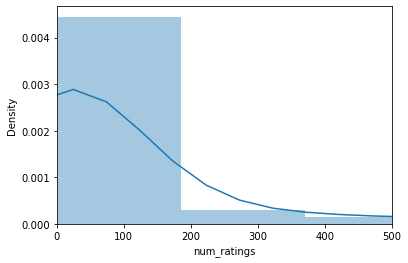

In [26]:
_ = sns.distplot(ratings_df['num_ratings'])
_ = plt.xlim([0,500])
plt.show()

C:\Users\sathw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


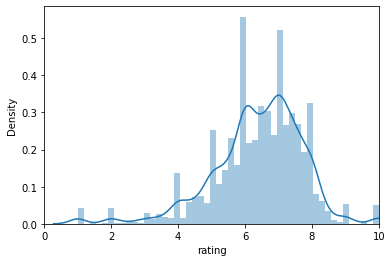

In [27]:
_ = sns.distplot(ratings_df['rating'])
_ = plt.xlim([0,10])
plt.show()

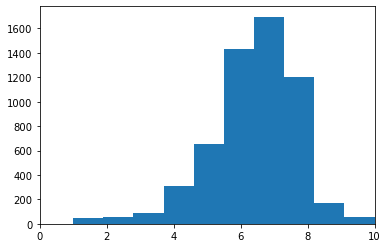

In [28]:
_ = plt.hist(ratings_df['rating'], bins=10)
_ = plt.xlim([0,10])
plt.show()

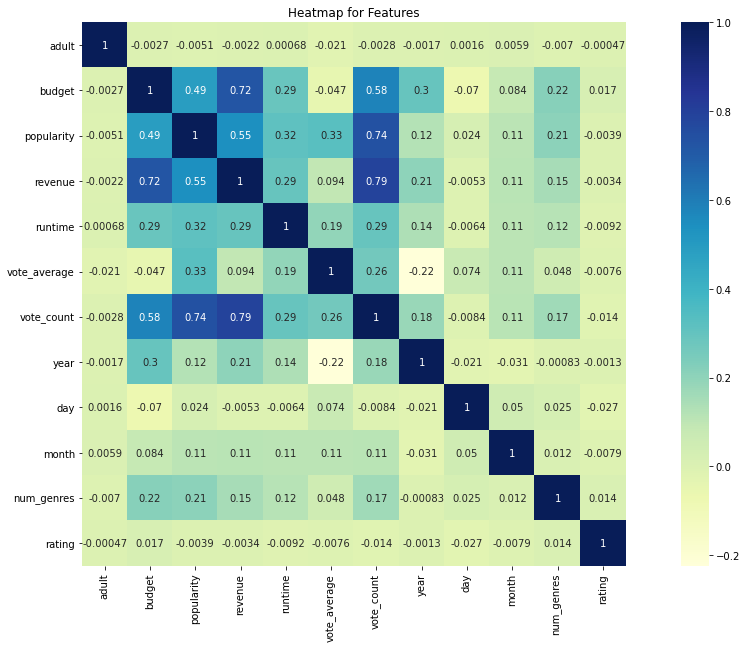

In [29]:
_ = plt.figure(figsize=(20,10))
_ = sns.heatmap(model_df.corr(), square=True, cmap="YlGnBu", annot=True)
_ = plt.title("Heatmap for Features")
plt.show()

In [30]:
model_df.dtypes

adult                       bool
belongs_to_collection     object
budget                   float64
genres                    object
homepage                  object
original_language         object
original_title            object
popularity               float64
production_companies      object
production_countries      object
revenue                  float64
runtime                  float64
spoken_languages          object
vote_average             float64
vote_count               float64
year                     float64
day                      float64
month                    float64
num_genres                 int64
rating                   float64
dtype: object

In [31]:
model_df['original_language'].fillna('', inplace=True)

In [32]:
#model_df = model_df.dropna(['rating','month', 'day', 'year'])

In [33]:
model_df.isnull().sum()

adult                         0
belongs_to_collection    870552
budget                        0
genres                        0
homepage                 868936
original_language             0
original_title                0
popularity                    0
production_companies          0
production_countries          0
revenue                       0
runtime                      91
spoken_languages              0
vote_average                  0
vote_count                    0
year                          0
day                           0
month                         0
num_genres                    0
rating                        0
dtype: int64

In [34]:
model_df['production_companies']

0          ['Pixar Animation Studios']
1          ['Pixar Animation Studios']
2          ['Pixar Animation Studios']
3          ['Pixar Animation Studios']
4          ['Pixar Animation Studios']
                      ...             
1183187          ['Star Film Company']
1183188          ['Star Film Company']
1183189          ['Star Film Company']
1183190          ['Star Film Company']
1183202                ['Sine Olivia']
Name: production_companies, Length: 1142850, dtype: object

## Feature Engineering<a id='1.4_Feature_Engineering'></a>

In [53]:
def feat_eng(df):
    
    #df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda b: 0 if b == np.nan else 1)
    #df['homepage'] = df['homepage'].apply(lambda b: 0 if b == np.nan else 1)
    
    df['original_language'] = df['original_language'].apply(lambda l: 1 if l == 'en' else 0)
    
    #df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    #df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    
    df['spoken_languages'] = df['spoken_languages'].apply(lambda s: 1 if s == 'English' else 0)
    df['runtime'] = df['runtime'].fillna(combined_df['runtime'].mean())
    df = df.drop(['original_title', 'adult','genres', 'homepage', 'belongs_to_collection'], axis=1)
    return df

In [54]:
def one_hot_top_x(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(small_df[variable] == label, 1,0) 

In [55]:
type(model_df)

pandas.core.frame.DataFrame

In [56]:
print("shape of the dataset: ", model_df.shape)

shape of the dataset:  (1142850, 20)


### Model Building<a id='1.4.1_Model_Building'></a>

In [57]:
small_df = model_df.sample(frac = 0.02, axis=0)

In [58]:
small_df.shape

(22857, 20)

In [59]:
type(small_df)

pandas.core.frame.DataFrame

In [60]:
def change(col):
    print(col)
    if not col:
        return "missing"
    return "_".join(col)
#if-else

In [61]:
a = ['Paramount Pictures', 'Universum Film (UFA)']
"_".join(a)

'Paramount Pictures_Universum Film (UFA)'

In [62]:
small_df['production_companies'] = small_df['production_companies'].apply(change)

['Columbia Pictures Corporation', 'Ranown Pictures Corp.']
['Columbia Pictures', 'The Zanuck Company', 'Jinks/Cohen Company', 'Tim Burton Productions']
['Pandora Cinema', 'Twentieth Century Fox Film Corporation', 'Flower Films', 'Adam Fields Productions']
['Gaumont British Picture Corporation']
[]
['TriStar Pictures', 'Rastar Films']
['Seven Arts Productions', 'Allied Artists', 'Transworld Pictures']
['C.G. Silver Film']
['Columbia Pictures Corporation', 'Pariah Entertainment Group', 'Grand Slam Productions', "Mel's Cite du Cinema"]
['Live Entertainment', 'Lionsgate', 'Dog Eat Dog Productions Inc.']
["Loew's", 'Metro-Goldwyn-Mayer (MGM)']
['Gray Film', 'Gaumont Distribution', 'Alter Films', 'Specta Films', 'Film del Centauro', 'Cady Films']
['20th Century Fox', 'Largo Entertainment', 'JVC Entertainment Networks']
['Universal Pictures', 'The Kennedy/Marshall Company', 'Hypnotic', 'Motion Picture THETA Produktionsgesellschaft', 'Ludlum Entertainment']
['Procirep', 'Constellation Producti

['Mosfilm', 'Creative Unit of Writers & Cinema Workers', 'Unit Four']
['Columbia Pictures', 'Intermedia Films', 'Warner Bros.', 'C-2 Pictures', 'IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG', 'Mostow/Lieberman Productions']
['Julian Blaustein Productions']
['Granada Film Productions', 'A&E Television Networks']
['Touchstone Pictures']
['Universal Pictures', 'DNA Films', 'StudioCanal', 'Working Title Films']
['Transatlantic Pictures', 'Warner Bros.', 'Metro-Goldwyn-Mayer (MGM)']
['Lone Star Corporation']
['Zentropa Entertainments', 'Danmarks Radio (DR)', 'Trollhättan Film AB', 'Memfis Film', 'France 3 Cinéma', 'Sveriges Television (SVT)', 'Yleisradio (YLE)', 'Arte France Cinéma', 'Slot Machine', 'Liberator Productions', 'Nederlandse Programma Stichting (NPS)', 'Isabella Films B.V.', 'WDR / Arte', 'Film i Väst', 'Pain Unlimited GmbH Filmproduktion', 'Something Else B.V.', 'Sigma Films', 'Zoma Films Ltd.', 'Norsk TV2 AS']
[]
['Warner Bros.', 'Dog Eat Dog Films']
['Colum

['United Artists', 'Roy Export Company Establishment']
['George Stevens Productions']
['Twentieth Century Fox Film Corporation', 'Conundrum Entertainment']
['Twentieth Century Fox Film Corporation', 'Kent Productions']
['Kintop Pictures']
['Warner Bros.']
[]
['New Line Cinema', 'Smart Egg Pictures']
['France 3 Cinéma', 'Claudie Ossard Productions', 'MMC Independent', 'Canal+', 'Tapioca Films', 'Sofica Sofinergie 5', 'Victoires Productions', 'Filmstiftung Nordrhein-Westfalen', 'Union Générale Cinématographique (UGC)']
['Paramount Pictures', 'Cruise/Wagner Productions']
['One Race Films', 'Radar Pictures']
['Avalon Studios', 'New Zealand Film Commission', 'New Zealand On Air']
['TriStar Pictures']
['Columbia Pictures', 'Intermedia Films', 'Warner Bros.', 'C-2 Pictures', 'IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG', 'Mostow/Lieberman Productions']
['Paramount Pictures']
['Columbia Pictures Corporation', 'Jerry Weintraub Productions', 'Delphi Films']
['Darkwoods Produc

['Werner Herzog Filmproduktion', 'Hessischer Rundfunk (HR)']
['United Artists', 'Eon Productions', 'Danjaq']
['Société Nouvelle de Cinématographie', 'Les Films Impéria', 'Les Productions Georges de Beauregard']
['Mantarraya Producciones', 'No Dream Cinema', 'Motel Films']
['Euro-International Film', 'Les Films de la Boétie']
['20th Century Fox', 'Largo Entertainment', 'JVC Entertainment Networks']
['Kintop Pictures']
['Warner Bros.']
[]
['Saga Film', 'Mobra Films', 'Mindshare Media', 'Centrul National al Cinematografiei (CNC)', 'McCann-Erickson', 'Televiziunea Romana (TVR1)', 'Hubert Bals Fund of the Rotterdam Festival, The']
['Mandate Pictures', 'Three Strange Angels']
['Bazmark Films', 'Twentieth Century Fox Film Corporation']
['Miramax Films', 'Universal Pictures']
['Hawk Films', 'Warner Bros.', 'Peregrine']
['Fortissimo Films', 'Process Productions', 'Q Television']
['Fine Line Features', 'Zentropa Entertainments', 'Danmarks Radio (DR)', 'SVT Drama', 'Arte', 'Memfis Film', 'France 

['Twentieth Century Fox Film Corporation', 'Dune Entertainment', 'Anka Film', 'EuropaCorp', 'Daybreak Productions', 'Prime Universe Productions']
['Universal Pictures', 'Amblin Entertainment', 'Warner Bros.', 'Constant c Productions']
['Gracie Films', 'Twentieth Century Fox Film Corporation']
[]
['Selznick International Pictures']
['Silver Films', 'Cormoran Films', 'Argos Films', 'Cineriz', 'Terra Film', 'Cinétel']
['Lionsgate', 'Relativity Media', 'Sighvatsson Films', 'Michael De Luca Productions', 'Palomar Pictures (II)']
['X-Filme Creative Pool', 'Westdeutscher Rundfunk (WDR)']
['Paramount Pictures', 'Universal Pictures', 'Shamley Productions']
['Imagine Entertainment', 'Universal Pictures']
['Wild Bunch', 'Telecinco', 'Telecinco Cinema', 'Televisió de Catalunya TV3', 'Esta Vivo! Laboratorio de Nuevos Talentos', 'Grupo Rodar', 'Rodar y Rodar Cine y Televisión', 'Warner Bros. Pictures de España']
['GFP Medienfonds']
['TF1 Films Production', 'Canal+', 'TPS Star', 'TF1 International', 

['Paramount Pictures']
['Twentieth Century Fox Film Corporation']
['Les Films Pomereu', 'Gaumont International']
['Madeleine Films']
['BIM Distribuzione', 'Fellowship Adventure Group']
['Paramount Pictures', 'Miramax Films', 'Timnick Films', 'Mirage Enterprises']
['Mantarraya Producciones', 'No Dream Cinema', 'Motel Films']
['Mandate Pictures', 'Three Strange Angels']
['Silver Screen Partners III', 'Touchstone Pictures']
[]
['Rainforest Films']
['Zespół Filmowy TOR', 'Le Studio Canal+', 'France 3 Cinéma', 'Télévision Suisse-Romande']
['El Deseo', 'France 3 Cinéma', 'CiBy 2000']
['Interlagar Films', 'Naga Films', 'Zebra Films']
['New Line Cinema', 'Larger Than Life Productions']
['Warner Bros.']
['Victorian Film', 'The Film House']
['London Film Productions', 'British Lion Film Corporation', 'The Criterion Collection']
['Paramount Pictures', 'Universum Film (UFA)']
['Columbia Pictures Corporation']
['Woods Entertainment', 'Dimension Films']
['Universal Pictures', 'Liveplanet', 'Zide-Per

['New Line Cinema', 'The Turman-Morrissey Company', 'Savoy Pictures']
['Happy End Filmproductions AB', 'Filmpool Nord', 'Solar Films inc.', 'Svensk Filmindustri']
['Hawk Films', 'Warner Bros.']
['Universal Pictures', 'Universal Home Video']
['Village Roadshow Pictures', 'NPV Entertainment', 'Silver Pictures', 'Warner Bros.']
['Roxbury Productions']
['Full Moon Entertainment']
['Filmways Pictures', 'Metro-Goldwyn-Mayer (MGM)']
['United Artists', 'Star Partners II Ltd.']
['Stanley Kubrick Productions', 'Metro-Goldwyn-Mayer (MGM)']
['Universal Pictures']
['Silent Hill DCP Inc.', 'Davis-Films', 'TriStar Pictures', 'Konami']
['Village Roadshow Pictures', 'Robert Simonds Productions', 'Warner Bros.', 'Phoenix Pictures', 'Underground', 'Proposal Productions']
['Jupiter Generale Cinematografica', 'Terra-Filmkunst', 'Les Films de la Boétie']
['Cady', 'Discina']
['Laurel Group', 'Dawn Associates']
['Pandora Cinema', 'Portobello Pictures', 'Ceská Televize', 'Biograf Jan Svěrák', 'CinemArt', "Fond

['Telemondial']
['Avon Production', 'Metro-Goldwyn-Mayer (MGM)']
['United Artists', 'Eon Productions', 'Danjaq']
['Paramount Pictures']
['Gendai Eigasha']
['Twentieth Century Fox Film Corporation', 'APJAC Productions']
['Filmax Entertainment', 'Castelao Producciones', 'Canal+ España', 'Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA)', 'ICF']
['Lions Gate Films', 'Twisted Pictures']
['Filmco International Productions']
[]
['Daiei Studios']
['Paramount Pictures', 'Lakeshore Entertainment']
['Société générale des films']
['TF1 Films Production', 'Canal+', 'TPS Star', 'TF1 International', 'Sofica Valor 7', 'Légende Films', 'Okko Productions', 'Songbird Pictures', 'Scotts Atlantic']
['New Line Cinema', 'American Zoetrope']
['Universal Pictures', 'Amblin Entertainment', 'U-Drive Productions']
['Castle Rock Entertainment', 'Darkwoods Productions', 'Warner Bros.']
['New Line Cinema', 'Larger Than Life Productions']
['Warner Bros. Family Entertainment', 'Northern Lights Enter

['Universal Pictures', 'Alive Films', 'Larry Franco Productions']
['C.V. Whitney Pictures', 'Warner Bros.']
['20th Century Fox', 'Largo Entertainment', 'JVC Entertainment Networks']
['Regency Enterprises', 'Warner Bros.']
['20th Century Fox', 'Largo Entertainment', 'JVC Entertainment Networks']
['Paramount Pictures', 'The Coppola Company', 'The Directors Company']
['DNA Films', 'British Film Council']
['Miramax Films', 'A Band Apart', 'Super Cool ManChu']
['Metro-Goldwyn-Mayer (MGM)']
['Fidélité Productions', 'Euro Space Inc.']
['George Pal Productions', 'Galaxy Films Inc.']
['Discovery Docs']
['Virtual Studios', 'Legendary Pictures', 'Hollywood Gang Productions', 'Atmosphere Entertainment MM', 'Warner Bros.', 'Nimar Studios', 'Cruel and Unusual Films']
['Paramount Pictures']
[]
['Yari Film Group']
['Media 8 Entertainment', 'Empire Films', 'Alla Prima Productions', 'Brushwork Pictures']
['Art Theatre Guild']
['United Artists', 'Joseph E. Levine Productions']
['Twentieth Century Fox Fil

['Warner Bros.']
['Babelsberg Film GmbH']
['Paramount Pictures']
['Bruce Brown Films']
[]
['Full Moon Entertainment']
['Gracie Films', 'Columbia Pictures Corporation']
['Norma Productions']
[]
[]
['Universal Pictures', 'Amblin Entertainment', 'U-Drive Productions']
['IFC Films', 'Mirabai Films', 'The Criterion Collection']
['Les Films du Carrosse', 'Soprofilms', 'Films A2']
['Lakeshore Entertainment', 'Screen Gems', 'Arlington Road Productions Corporation', 'Gorai / Samuelson Productions', 'Samuelson Productions']
['Paramount Pictures', 'Hal Wallis Productions']
['Media 8 Entertainment', 'Empire Films', 'Alla Prima Productions', 'Brushwork Pictures']
['Universal Pictures', 'Amblin Entertainment', 'U-Drive Productions']
['Metro-Goldwyn-Mayer (MGM)']
['Herzog']
['Kintop Pictures']
['Universal Pictures', 'Apatow Productions']
['American Zoetrope', 'TriStar Pictures']
['Roxbury Productions']
['Warner Bros.', 'Morgan Creek Productions']
['TriStar Pictures']
['Universal Pictures', 'Universal

['Eve Productions Inc.']
['Warner Bros.', 'The Ladd Company']
['TriStar Pictures', 'Carolco Pictures']
['DreamWorks SKG', 'Amblin Entertainment', 'Parkes/MacDonald Productions']
['Columbia Pictures', 'The Zanuck Company', 'Jinks/Cohen Company', 'Tim Burton Productions']
['Tiger Film', 'Delta']
['New Line Cinema', 'Ghoulardi Film Company', 'Lawrence Gordon Productions']
['BIM Distribuzione', 'Fellowship Adventure Group']
['Sputnik Oy']
['Televisión Española TVE', 'Canal+ España', 'El Deseo S.A.']
['Amiguetes Entertainment S.L.']
['Omega Film AB', 'Jörn Donner Productions', 'FJ Filmi']
[]
['Columbia Pictures', 'Intermedia Films', 'Warner Bros.', 'C-2 Pictures', 'IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG', 'Mostow/Lieberman Productions']
['Paramount Pictures']
[]
['IFC Films', 'Mirabai Films', 'The Criterion Collection']
['Nouvelles Éditions de Film']
['New World Pictures', 'Cinemarque Entertainment']
['Silent Hill DCP Inc.', 'Davis-Films', 'TriStar Pictures', 'Konam

['Seven Arts Productions', 'Allied Artists', 'Transworld Pictures']
['Turner Network Television', 'Five Mile River Films', 'Beta Film', 'Lux Vide']
['Warner Bros.']
['RKO Radio Pictures']
['ADR Productions', 'SND', 'Agence BJP']
['Twentieth Century Fox Film Corporation', 'Crossbow Productions', 'Gruskoff/Venture Films', 'Jouer Limited']
['Universal Pictures', 'Big Talk Productions', 'StudioCanal', 'GAGA', 'Working Title Films']
['British International Pictures (BIP)']
['Lions Gate Films', 'Twentieth Century Fox Film Corporation', 'Centropolis Entertainment', 'Mark Gordon Productions', "Mel's Cite du Cinema"]
['Metro-Goldwyn-Mayer (MGM)', 'Shaft Productions Ltd.']
['Universal Pictures']
[]
['Gracie Films', 'Twentieth Century Fox Film Corporation']
['DSM III', 'Warner Bros.']
['Canal Plus', 'Regency Enterprises', 'Alcor Films']
['Granada Film Productions', 'A&E Television Networks']
['Casey Silver Productions', 'China Film Co-Production Corporation', 'Huayi Brothers', 'Relativity Media']

['Castle Rock Entertainment', 'Darkwoods Productions', 'Warner Bros.']
['New Line Cinema', 'Smart Egg Pictures']
['Lakeshore Entertainment', 'Screen Gems', 'Arlington Road Productions Corporation', 'Gorai / Samuelson Productions', 'Samuelson Productions']
['Mantarraya Producciones', 'No Dream Cinema', 'Motel Films']
['United Artists', 'D.W. Griffith Productions']
['Salty Pictures', 'Just Singer Entertainment']
['Carlyle Production']
['Mosfilm', 'Creative Unit of Writers & Cinema Workers', 'Unit Four']
['The Mirisch Corporation', 'Solar Productions', 'Simkoe']
['Gus Productions', 'Warner Bros.']
['Rene Clair Productions']
['Great American Films Limited Partnership', 'Vestron Pictures']
['Paramount Pictures', 'The Coppola Company', 'The Directors Company']
['Kanoon']
['Zespół Filmowy TOR', 'Le Studio Canal+', 'France 3 Cinéma', 'Télévision Suisse-Romande']
['Paramount Pictures', 'Eddie Murphy Productions']
['New Line Cinema']
['Bruce Brown Films']
['Universal Pictures', 'Alive Films', 'L

['Tiger Film', 'Delta']
['Flora Film', 'Rialto Film Preben-Philipsen', 'National Cenematografica']
['Gaumont British Picture Corporation']
['Live Entertainment', 'Lionsgate', 'Dog Eat Dog Productions Inc.']
['Twentieth Century Fox Film Corporation']
['Paramount Pictures', 'Miramax Films', 'Scott Rudin Productions']
['Columbia Pictures Corporation', 'Don Simpson/Jerry Bruckheimer Films']
['Toho Film (Eiga) Co. Ltd.']
['PolyGram Filmed Entertainment', 'Warner Bros.']
['Toho Company']
['Paramount Pictures', 'David L. Wolper Productions']
['Stanley Kubrick Productions', 'Metro-Goldwyn-Mayer (MGM)']
['Gaumont International', 'Les Productions de la Guéville']
['Millennium Films', 'Emmett/Furla Films']
['Pathé Renn Productions', 'TF1 Films Production', 'Canal+', 'Pathe', 'Two Brothers Productions']
['Paramount Pictures']
['JVC Entertainment', 'Pandora Filmproduktion', 'Newmarket Capital Group', '12 Gauge Productions']
['Mosfilm', 'Creative Unit of Writers & Cinema Workers', 'Unit Four']
['Col

['Yash Raj Films']
['Village Roadshow Pictures', 'Robert Simonds Productions', 'Warner Bros.', 'Phoenix Pictures', 'Underground', 'Proposal Productions']
['Aniplex', 'Production I.G.']
['X-Filme Creative Pool', 'Westdeutscher Rundfunk (WDR)']
['Universal Pictures', 'Amblin Entertainment', 'U-Drive Productions']
['Fine Line Features']
['RKO Radio Pictures']
['Hammer Film Productions']
['Universal Pictures']
['Pathé Renn Productions', 'TF1 Films Production', 'Canal+', 'Pathe', 'Two Brothers Productions']
['Columbia Pictures']
['Village Roadshow Pictures', 'Warner Bros.', 'Riche-Ludwig Productions', 'Groucho III Film Partnership']
['BBC Films', 'Filmstiftung Nordrhein-Westfalen', 'X-Filme Creative Pool', 'Ealing Studios', 'Fragile Films', 'Focus Features', 'RTL', 'Cougar Films Ltd.', 'Minotaur Film Partnership No. 3']
['GFP Medienfonds']
['Metro-Goldwyn-Mayer (MGM)']
['Universal Pictures', 'Jersey Films']
['Hawk Films', 'Warner Bros.']
['Hollywood Pictures', 'The Charlie Mopic Company', '

['Twentieth Century Fox Film Corporation', 'Gordon Company', 'Silver Pictures']
['Bac Films', 'Canal+Polska', 'Heritage Films', 'Studio Babelsberg', 'Agencja Produkcji Filmowej', 'Beverly Detroit', 'FilmFernsehFonds Bayern', 'Filmboard Berlin-Brandenburg (FBB)', 'Mainstream S.A.', 'R.P. Productions', 'StudioCanal', 'Filmförderungsanstalt (FFA)', 'Canal+', 'Interscope Communications', 'Telewizja Polska (TVP)', 'Runteam']
['Discina']
['Empire Pictures']
['Millennium Films', 'Emmett/Furla Films']
['Paramount Pictures', 'DreamWorks SKG', 'Laurence Mark Productions']
['Columbia Pictures Corporation', 'Rising Star', 'Relativity Media', 'Phoenix Pictures', 'VIP 4 Medienfonds']
['Yari Film Group']
[]
['Contrafilm', 'Firm Films', 'Touchstone Pictures', 'Beacon Pictures', 'Eyetronics']
['Happy End Filmproductions AB', 'Filmpool Nord', 'Solar Films inc.', 'Svensk Filmindustri']
['Bruce Brown Films']
['New Line Cinema', 'Tribeca Productions', 'Baltimore Pictures']
['Kintop Pictures']
['Paramount P

['Scala Productions', 'Wildgaze Films']
['Universal Pictures', 'Amblin Entertainment', 'U-Drive Productions']
['Dark Horse Entertainment', 'Image Entertainment']
['Thalia Productions']
['Amiguetes Entertainment S.L.']
['Universal Pictures', 'DNA Films', 'StudioCanal', 'Working Title Films']
['Nouvelles Éditions de Film']
['Mosfilm', 'Creative Unit of Writers & Cinema Workers', 'Unit Four']
['Alta Films S.A.', 'TTornasol Films S.A.']
['Schiwago Film']
['Iced Tea Productions']
['Mantarraya Producciones', 'No Dream Cinema', 'Motel Films']
['Universal Pictures', 'Renaissance Pictures', 'Alphaville Films']
['Iced Tea Productions']
['Walt Disney Pictures', 'Pixar Animation Studios']
['IFC Films', 'Mirabai Films', 'The Criterion Collection']
['Paramount Pictures', 'Miramax Films', 'Timnick Films', 'Mirage Enterprises']
['Endless Entertainment', 'Rhino Films', 'Sea Dragon']
['Iced Tea Productions']
['Senator Film Produktion', 'Wildwood Enterprises', 'Sound for Film', 'Inca Films S.A.', 'Filmfo

['Miramax Films', 'A Band Apart', 'Super Cool ManChu']
['Gracie Films', 'Twentieth Century Fox Film Corporation']
['Les Films Pomereu', 'Gaumont International']
['Mosfilm']
['Canal Plus', 'CB Films', 'Centre National de la Cinématographie', 'Flach Films', 'TLA Releasing']
[]
['London Film Productions', 'British Lion Film Corporation', 'The Criterion Collection']
['TF1 Films Production', 'Canal+', 'TPS Star', 'TF1 International', 'Sofica Valor 7', 'Légende Films', 'Okko Productions', 'Songbird Pictures', 'Scotts Atlantic']
['Paramount Pictures']
['Seven Pictures', 'herbX film GmbH']
['Constantin Film Produktion', 'Produzioni Europee Associati (PEA)']
['George Pal Productions', 'Galaxy Films Inc.']
['Amblin Entertainment', 'Warner Bros.']
['The Ontario Film Development Corporation', 'Bedard/Lalonde Amusements', 'Space: The Imagination Station']
['Zespół Filmowy TOR', 'Le Studio Canal+', 'France 3 Cinéma', 'Télévision Suisse-Romande']
['Columbia Pictures', 'Intermedia Films', 'Warner Bros

['Columbia Pictures', 'Merchant Ivory Productions']
['Lions Gate Films', 'Twisted Pictures', 'Evolution Entertainment', 'Saw Productions Inc.']
['Sino Filmes']
['Universal Pictures', 'Renaissance Pictures', 'Dark Horse Entertainment', 'Largo Entertainment', 'Signature Pictures', 'JVC Entertainment Networks']
['Paramount Pictures']
['Spyglass Entertainment', 'Touchstone Pictures', 'Triple Threat Talent']
['Twentieth Century Fox Film Corporation', 'Crossbow Productions', 'Gruskoff/Venture Films', 'Jouer Limited']
['Paramount Pictures', 'Documento Film']
['Metro-Goldwyn-Mayer (MGM)']
['TriStar Pictures', 'Carolco Pictures']
['France 3 Cinéma', 'Canal+', 'Pathé', 'KC Medien', 'Compagnie Eric Rohmer (CER)', 'Pathé Image Production']
['Trust Film', 'Danish Film Institute']
['Twentieth Century Fox Film Corporation', 'Kent Productions']
['Warner Bros.']
['Paramount Pictures', 'Miramax Films', 'Scott Rudin Productions']
['Wüste Filmproduktion']
['Casey Silver Productions', 'China Film Co-Produc

['Columbia Pictures']
['United Artists']
['Iced Tea Productions']
['JVC Entertainment', 'Pandora Filmproduktion', 'Newmarket Capital Group', '12 Gauge Productions']
['Universal Pictures', 'Celandine Films', 'The Monty Python Partnership']
['Hawk Films', 'Warner Bros.']
['Universal Pictures', 'Kennedy/Marshall Company, The', 'Hypnotic', 'Kalima Productions GmbH & Co. KG', 'Stillking Films']
['Peter Rommel Productions']
['Village Roadshow Pictures', 'Malpaso Productions', 'NPV Entertainment', 'Warner Bros.']
['Eve Productions Inc.']
['Kim Ki-Duk Film', 'Happinet Pictures']
['Pandora Cinema', 'Twentieth Century Fox Film Corporation', 'Flower Films', 'Adam Fields Productions']
['Studio 37', 'Versus Entertainment', 'The Safran Company', 'Dark Trick Films']
['Nippon Shuppan Hanbai (Nippan) K.K.', 'GAGA', 'WoWow', 'AM Associates', 'Kobi Co.', 'MF Pictures']
['Orion Pictures', 'Mysterious Arts', 'Orion Pictures Corporation']
['Lakeshore Entertainment', 'Screen Gems', 'Arlington Road Production

['Studio Hamburg Filmproduktion', 'Dom Film GmbH']
[]
['Beijing New Picture Film Co. Ltd.', 'China Film Co-Production Corporation']
['GFP Medienfonds']
['Les Films du Veyrier', 'Warp Films', 'Integral Films']
['Fine Line Features', 'Zentropa Entertainments', 'Danmarks Radio (DR)', 'SVT Drama', 'Arte', 'Memfis Film', 'France 3 Cinéma', 'Angel films', 'TV 1000', 'Canal+', 'Constantin Film Produktion', 'Yleisradio (YLE)', 'Arte France Cinéma', 'Westdeutscher Rundfunk (WDR)', 'Blind Spot Pictures Oy', 'Vrijzinnig Protestantse Radio Omroep (VPRO)', 'Film4', 'Liberator Productions', 'Icelandic Film', 'Film i Väst', 'Pain Unlimited GmbH Filmproduktion', 'Trust Film Svenska', 'Cinematograph A/S', 'What Else? B.V', 'Filmek A/S', 'Lantia Cinema & Audiovisivi']
[]
['Walt Disney Pictures', 'Walt Disney Animation Studios']
['Emotion Pictures', 'Reverse Angle International', 'InDigEnt (Independent Digital Entertainment)']
['Turner Network Television', 'Five Mile River Films', 'Beta Film', 'Lux Vide'

In [63]:
# one hot encode these two columns for better results
#pd.get_dummies(small_df.production_companies.apply(pd.Series).stack(),small_df.production_countries.apply(pd.Series).stack()).sum(level=0) 
pd.get_dummies(small_df['production_companies'])
#prefix=['production_companies', 'production_countries'], columns=['production_companies', 'production_countries'])
#unhashable list 

,"[_""_I_n_s_t_i_t_u_t_ _N_a_t_i_o_n_a_l_ _d_e_ _l_'_A_u_d_i_o_v_i_s_u_e_l_ _(_I_N_A_)_""_,_ _'_F_i_l_m_s_ _P_a_r_i_s_-_N_e_w_ _Y_o_r_k_'_,_ _'_A_r_t_c_o_-_F_i_l_m_'_]","[_""_L_e_s_ _F_i_l_m_s_ _d_'_I_c_i_""_,_ _'_G_i_m_a_g_e_s_ _2_0_4_'_]","[_""_L_o_e_w_'_s_ _I_n_c_o_r_p_o_r_a_t_e_d_""_]","[_""_L_o_e_w_'_s_""_,_ _'_M_e_t_r_o_-_G_o_l_d_w_y_n_-_M_a_y_e_r_ _(_M_G_M_)_'_]","[_""_M_r_s_._ _W_h_i_t_e_'_s_ _P_r_o_d_u_c_t_i_o_n_s_""_]","[_""_P_i_n_t_ _O_'_B_i_t_t_e_r_ _P_r_o_d_u_c_t_i_o_n_s_""_,_ _'_G_u_i_l_d_'_]","[_""_P_r_o_d_u_z_i_o_n_e_ _S_a_l_v_o_ _D_'_A_n_g_e_l_o_""_,_ _'_T_e_v_e_r_e_ _F_i_l_m_'_]","[_""_R_é_a_l_i_s_a_t_i_o_n_ _d_'_A_r_t_ _C_i_n_é_m_a_t_o_g_r_a_p_h_i_q_u_e_""_]",[_'_1_0_1_s_t_ _S_t_r_e_e_t_ _F_i_l_m_s_'_],"[_'_1_4_9_2_ _P_i_c_t_u_r_e_s_'_,_ _'_H_e_y_d_a_y_ _f_i_l_m_s_'_,_ _'_W_a_r_n_e_r_ _B_r_o_s_._'_]",...,[_'_Z_o_p_i_x_ _C_o_m_p_a_n_y_'_],"[_'_Z_w_e_i_t_e_s_ _D_e_u_t_s_c_h_e_s_ _F_e_r_n_s_e_h_e_n_ _(_Z_D_F_)_'_,_ _'_L_e_s_ _F_i_l_m_s_ _A_r_i_a_n_e_'_,_ _'_R_A_I_ _R_a_d_i_o_t_e_l_e_v_i_s_i_o_n_e_ _I_t_a_l_i_a_n_a_'_,_ _'_C_r_i_s_t_a_l_d_i_f_i_l_m_'_]","[_'_Z_w_e_i_t_e_s_ _D_e_u_t_s_c_h_e_s_ _F_e_r_n_s_e_h_e_n_ _(_Z_D_F_)_'_,_ _'_W_ü_s_t_e_ _F_i_l_m_'_]",[_'_b_o_x_!_ _F_i_l_m_ _H_a_m_b_u_r_g_'_],[_'_d_._i_._e_._f_i_l_m_'_],[_'_i_c_o_n_'_],"[_'_r_u_s_t_y_ _b_e_a_r_ _e_n_t_e_r_t_a_i_n_m_e_n_t_'_,_ _'_l_u_c_k_y_ _c_r_o_w_ _f_i_l_m_s_'_]",[_'_М_е_ж_р_а_б_п_о_м_-_Р_у_с_ь_'_],[_'_О_д_е_с_с_к_а_я_ _к_и_н_о_с_т_у_д_и_я_'_],[_]
994913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
628898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
563151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1143393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
#pd.get_dummies(small_df.production_countries.apply(pd.Series).stack()).sum(level=0)

In [65]:
small_df.production_companies.value_counts().sort_values(ascending=False).head(20)

[_]                                                                                                                                                                                                                                                                                                                                                        1196
[_'_P_a_r_a_m_o_u_n_t_ _P_i_c_t_u_r_e_s_'_]                                                                                                                                                                                                                                                                                                                 585
[_'_U_n_i_v_e_r_s_a_l_ _P_i_c_t_u_r_e_s_'_]                                                                                                                                                                                                                                                             

In [66]:
small_df.production_countries.value_counts().sort_values(ascending=False)

['United States of America']                      10902
['United Kingdom']                                 1251
['Germany']                                        1105
['France']                                         1098
['United Kingdom', 'United States of America']      865
                                                  ...  
['United Kingdom', 'Ireland']                         1
['Sweden', 'Germany', 'France']                       1
['Italy', 'Spain']                                    1
['France', 'Germany', 'Hungary']                      1
['Austria', 'Switzerland']                            1
Name: production_countries, Length: 317, dtype: int64

In [67]:
# encode the top 10 most frequent
top_10_comp = [x for x in small_df.production_companies.value_counts().sort_values(ascending=False).head(10).index]
top_10_count = [x for x in small_df.production_countries.value_counts().sort_values(ascending=False).head(10).index]

In [68]:
top_10_comp

['[_]',
 "[_'_P_a_r_a_m_o_u_n_t_ _P_i_c_t_u_r_e_s_'_]",
 "[_'_U_n_i_v_e_r_s_a_l_ _P_i_c_t_u_r_e_s_'_]",
 "[_'_M_e_t_r_o_-_G_o_l_d_w_y_n_-_M_a_y_e_r_ _(_M_G_M_)_'_]",
 "[_'_T_w_e_n_t_i_e_t_h_ _C_e_n_t_u_r_y_ _F_o_x_ _F_i_l_m_ _C_o_r_p_o_r_a_t_i_o_n_'_]",
 "[_'_K_i_n_t_o_p_ _P_i_c_t_u_r_e_s_'_]",
 "[_'_C_o_l_u_m_b_i_a_ _P_i_c_t_u_r_e_s_'_]",
 "[_'_T_r_i_S_t_a_r_ _P_i_c_t_u_r_e_s_'_]",
 "[_'_A_v_a_l_o_n_ _S_t_u_d_i_o_s_'_,_ _'_N_e_w_ _Z_e_a_l_a_n_d_ _F_i_l_m_ _C_o_m_m_i_s_s_i_o_n_'_,_ _'_N_e_w_ _Z_e_a_l_a_n_d_ _O_n_ _A_i_r_'_]",
 "[_'_G_a_u_m_o_n_t_ _B_r_i_t_i_s_h_ _P_i_c_t_u_r_e_ _C_o_r_p_o_r_a_t_i_o_n_'_,_ _'_T_h_e_ _C_r_i_t_e_r_i_o_n_ _C_o_l_l_e_c_t_i_o_n_'_]"]

In [69]:
top_10_count

["['United States of America']",
 "['United Kingdom']",
 "['Germany']",
 "['France']",
 "['United Kingdom', 'United States of America']",
 "['Japan']",
 "['Germany', 'United States of America']",
 "['Italy']",
 "['Russia']",
 '[]']

In [70]:
one_hot_top_x(small_df, 'production_companies', top_10_comp)

In [71]:
one_hot_top_x(small_df, 'production_countries', top_10_count)

In [72]:
small_df.shape

(22857, 40)

In [73]:
len(small_df.production_companies)

22857

In [74]:
X,y=small_df.drop(['rating'], axis=1), small_df['rating']

In [75]:
X = feat_eng(X)

In [76]:
type(X)

pandas.core.frame.DataFrame

In [77]:
X.shape

(22857, 34)

In [78]:
X.columns

Index(['budget', 'original_language', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count', 'year', 'day', 'month', 'num_genres',
       'production_companies_[_]',
       'production_companies_[_'_P_a_r_a_m_o_u_n_t_ _P_i_c_t_u_r_e_s_'_]',
       'production_companies_[_'_U_n_i_v_e_r_s_a_l_ _P_i_c_t_u_r_e_s_'_]',
       'production_companies_[_'_M_e_t_r_o_-_G_o_l_d_w_y_n_-_M_a_y_e_r_ _(_M_G_M_)_'_]',
       'production_companies_[_'_T_w_e_n_t_i_e_t_h_ _C_e_n_t_u_r_y_ _F_o_x_ _F_i_l_m_ _C_o_r_p_o_r_a_t_i_o_n_'_]',
       'production_companies_[_'_K_i_n_t_o_p_ _P_i_c_t_u_r_e_s_'_]',
       'production_companies_[_'_C_o_l_u_m_b_i_a_ _P_i_c_t_u_r_e_s_'_]',
       'production_companies_[_'_T_r_i_S_t_a_r_ _P_i_c_t_u_r_e_s_'_]',
       'production_companies_[_'_A_v_a_l_o_n_ _S_t_u_d_i_o_s_'_,_ _'_N_e_w_ _Z_e_a_l_a_n_d_ _F_i_l_m_ _C_o_m_m_i_s_s_i_o_n_'_,_ _'_N_e_w_ _Z_e_a_l_a_n_d_ _O_n_ _A_i_r_'_]',
 

In [79]:
X.production_companies.value_counts().sort_values(ascending = False) 

[_]                                                                                                                                                                                1196
[_'_P_a_r_a_m_o_u_n_t_ _P_i_c_t_u_r_e_s_'_]                                                                                                                                         585
[_'_U_n_i_v_e_r_s_a_l_ _P_i_c_t_u_r_e_s_'_]                                                                                                                                         277
[_'_M_e_t_r_o_-_G_o_l_d_w_y_n_-_M_a_y_e_r_ _(_M_G_M_)_'_]                                                                                                                           213
[_'_T_w_e_n_t_i_e_t_h_ _C_e_n_t_u_r_y_ _F_o_x_ _F_i_l_m_ _C_o_r_p_o_r_a_t_i_o_n_'_]                                                                                                 205
                                                                                

In [80]:
X.original_language.value_counts()

1    16763
0     6094
Name: original_language, dtype: int64

#### Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#features= ['budget', 'popularity','revenue','runtime', 'vote_average', 'vote_count', 'month', 'day', 'year']
#X,y = combined_df[features].values, combined_df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 241)

rf_model = RandomForestRegressor(random_state = 241)
rf_model.fit(X_train,y_train)

print("R^2 Training Score: {:.3f}".format(rf_model.score(X_train, y_train)))
print('score on test set: {:.3f}'.format(rf_model.score(X_test, y_test)))

for name, importance in zip(features, rf_model.feature_importances_):
    print(name, "=", importance)

ValueError: could not convert string to float: "[_'_W_a_l_t_ _D_i_s_n_e_y_ _P_i_c_t_u_r_e_s_'_,_ _'_P_i_x_a_r_ _A_n_i_m_a_t_i_o_n_ _S_t_u_d_i_o_s_'_]"

In [ ]:
np.unique(y_test, return_counts=True)

In [ ]:
print(y_pred[:10])

In [ ]:
print(X_train.shape, X_test.shape)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error

evc_rf = explained_variance_score(y_test, y_pred)
print("The explained variance score of this model is: ", evc_rf)

mae_rf = mean_absolute_error(y_test, y_pred)
print("The mean absolute error of this model is: ", mae_rf)

mse_rf = mean_squared_error(y_test, y_pred)
print("The mean squared error of this model is: ", mse_rf)

msle_rf = mean_squared_log_error(y_test, y_pred)
print("The mean squared log error of this model is: ",msle_rf)

med_rf = median_absolute_error(y_test, y_pred)
print("the median absolute error of this model is: ", med_rf)

r2_rf = r2_score(y_test, y_pred, multioutput='variance_weighted')
print("The r2 score of this model is: ", r2_rf)

In [ ]:
scores = cross_val_score(rf_model, X, y, scoring='neg_mean_squared_error', cv=10)
final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))
print("Final RMSE: ", final_avg_rmse)

##### Hyperparamter Tuned

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 50, stop=500,num=5)]
max_depth = [int(x) for x in np.linspace(start = 1, stop= 20, num=5)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap =[True]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(rf_model,random_grid,n_iter=100,cv=5,verbose=1,random_state=241,n_jobs=-1)
rf_random.fit(X_train,y_train)

In [ ]:
ypred_rf = rf_random.predict(X_test)
print(ypred_rf[:10])

In [ ]:
print(rf_random.best_params_)

In [ ]:
print("lowest RMSE found: ", np.sqrt(np.abs(rf_random.best_score_)))

In [ ]:
evc_rf_t = explained_variance_score(y_test, ypred_rf)
print("The explained variance score of this model is: ", evc_rf_t)

mae_rf_t = mean_absolute_error(y_test, ypred_rf)
print("The mean absolute error of this model is: ", mae_rf_t)

mse_rf_t = mean_squared_error(y_test, ypred_rf)
print("The mean squared error of this model is: ", mse_rf_t)

msle_rf_t = mean_squared_log_error(y_test, ypred_rf)
print("The mean squared log error of this model is: ",msle_rf_t)

med_rf_t = median_absolute_error(y_test, ypred_rf)
print("the median absolute error of this model is: ", med_rf_t)

r2_rf_t = r2_score(y_test, ypred_rf, multioutput='variance_weighted')
print("The r2 score of this model is: ", r2_rf_t)

In [ ]:
scores_rf = cross_val_score(rf_random, X, y, scoring='neg_mean_squared_error', cv=10)
final_avg_rmse_rf = np.mean(np.sqrt(np.abs(scores_rf)))
print("Final RMSE: ", final_avg_rmse_rf)

In [ ]:
true_val = pd.DataFrame(data = {'prediction': ypred_rf, 'actual': y_test})

In [ ]:
error = ypred_rf - y_test

In [ ]:
error.head()

In [ ]:
error.plot(kind='hist',bins=40)

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=241)
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)


for name, importance in zip(features, gbr.feature_importances_):
    print(name, "=", importance)

In [ ]:
ypred_gbr = gbr.predict(X_test)

In [ ]:
evc_gbr= explained_variance_score(y_test, ypred_gbr)
print("The explained variance score of this model is: ", evc_gbr)

mae_gbr = mean_absolute_error(y_test, ypred_gbr)
print("The mean absolute error of this model is: ", mae_gbr)

mse_gbr = mean_squared_error(y_test, ypred_gbr)
print("The mean squared error of this model is: ", mse_gbr)

msle_gbr = mean_squared_log_error(y_test, ypred_gbr)
print("The mean squared log error of this model is: ",msle_gbr)

med_gbr = median_absolute_error(y_test, ypred_gbr)
print("the median absolute error of this model is: ", med_gbr)

r2_gbr = r2_score(y_test, ypred_gbr, multioutput='variance_weighted')
print("The r2 score of this model is: ", r2_gbr)

In [ ]:
scores_gbr = cross_val_score(gbr, X, y, scoring='neg_mean_squared_error', cv=10)
final_avg_rmse_gbr = np.mean(np.sqrt(np.abs(scores_gbr)))
print("Final RMSE: ", final_avg_rmse_gbr)

##### Hyperparamter Tuned

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.model_selection import GridSearchCV

#params = {'learning_rate': [0.01,0.05,0.10,0.20],
#          'subsample'    : [0.9, 0.5, 0.2, 0.1],
#          'n_estimators' : [100,500,1000, 1500],
#         'max_depth'    : [6,8,10,12]}


n_estimators = [int(x) for x in np.linspace(start = 100, stop=700,num=5)]
max_depth = [int(x) for x in np.linspace(start = 6, stop= 20, num=5)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap =[True,False]

random_grid = {'learning_rate': [0.01,0.05,0.10,0.20],
               'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
gcv_random = RandomizedSearchCV(GradientBoostingRegressor(),random_grid,n_iter=100,cv=5,verbose=1,random_state=241,n_jobs=-1)
gcv_random.fit(X_train,y_train)

#gcv = GridSearchCV(GradientBoostingRegressor(),param_grid= params, scoring = 'neg_mean_squared_error', cv=5, verbose=1,n_jobs=-1)
#gcv.fit(X_train, y_train)

In [ ]:
print("Best parameters: ", gcv_random.best_params_)
print("lowest RMSE found: ", np.sqrt(np.abs(gcv_random.best_score_)))

In [ ]:
ygcv_pred = gcv_random.predict(X_test)

In [ ]:
evc_gcv= explained_variance_score(y_test, ygcv_pred)
print("The explained variance score of this model is: ", evc_gcv)

mae_gcv = mean_absolute_error(y_test, ygcv_pred)
print("The mean absolute error of this model is: ", mae_gcv)

mse_gcv = mean_squared_error(y_test, ygcv_pred)
print("The mean squared error of this model is: ", mse_gcv)

msle_gcv = mean_squared_log_error(y_test, ygcv_pred)
print("The mean squared log error of this model is: ",msle_gcv)

med_gcv = median_absolute_error(y_test, ygcv_pred)
print("the median absolute error of this model is: ", med_gcv)

r2_gcv= r2_score(y_test, ygcv_pred, multioutput='variance_weighted')
print("The r2 score of this model is: ", r2_gcv)

In [ ]:
scores_gcv = cross_val_score(gcv_random, X, y, scoring='neg_mean_squared_error', cv=5)
final_avg_rmse_gcv = np.mean(np.sqrt(np.abs(scores_gcv)))
print("Final RMSE: ", final_avg_rmse_gcv)

In [ ]:
gcv_random.get_params().keys()

#### XGBoost

In [ ]:
import xgboost as xgb
housing_dmatrix = xgb.DMatrix(data = X, label = y)
gbm_param_grid = {'learning_rate': [0.01, 0.1, 0.5, 0.9],
                 'n_estimators':[200],
                  'subsample': [0.3, 0.5, 0.9]
                 }
gbm = xgb.XGBRegressor()
grid_mse = GridSearchCV(gbm, param_grid = gbm_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_mse.fit(X, y)
print('Best parameters found: ', grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

In [ ]:
scores2 = cross_val_score(gbm, X, y, scoring='neg_mean_squared_error', cv=5)
final_avg_rmse2 = np.mean(np.sqrt(np.abs(scores2)))
print("Final RMSE: ", final_avg_rmse2)